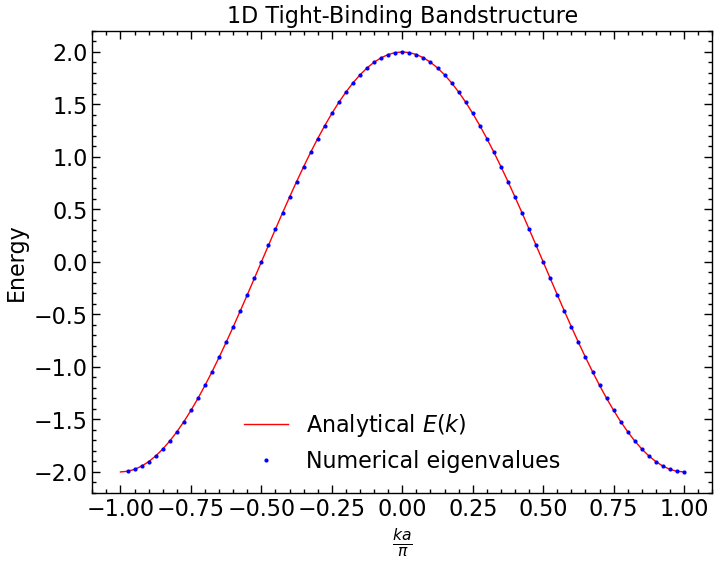

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh  
plt.style.use(["science" , "notebook"])


N = 80                 # Number of atoms :: Number of BAis Functions
t = +1.0                # hopping parameter
epsilon_0 = 0.0        # on-site energy
a = 1.0                # lattice constant

# Tight-Binding Hamiltonian with PBC
H = np.diag([epsilon_0]*N)  + np.diag([t]*(N-1), k=1) + np.diag([t]*(N-1), k=-1)          

H[0, -1] = H[-1, 0] = t                          # periodic boundary conditions


eigenvals, eigenVectors = eigh(H)

# Round to remove numerical fuzz
rounded_EIGNvals = np.round(eigenvals, decimals=10)

# Get unique eigenvalues (sorted)
unique_EIGNvals = np.unique(rounded_EIGNvals)

# Create +ka/π and -ka/π                                       #FIRST BRILLOUIN ZONE
num_unique = len(unique_EIGNvals)
k_pos = np.linspace(0, 1, num_unique)
k_full = np.concatenate([-k_pos[::-1], k_pos[1:-1]])  # mirror around 0 (avoid duplicating 0)   # array[start : stop : step]
E_full = np.concatenate([ unique_EIGNvals[1:-1],unique_EIGNvals[::-1]]) # symmetric energy spectrum


# Analytical band structure
k_vals = 2 * np.pi * np.arange(-N/2, N/2+1,1) / (N * a)       # allowed k-values  #1st BZ
E_analytical = epsilon_0 + 2 * t * np.cos(k_vals)

# Plot
plt.plot((k_vals*a)/np.pi, E_analytical, 'r-', label='Analytical $E(k)$' ,linewidth =  1)
plt.plot((((k_vals[1:]))*a)/np.pi, E_full, 'bo', markersize= 2, label='Numerical eigenvalues')
plt.xlabel(r"$\frac{ka}{\pi}$")
plt.ylabel("Energy")
plt.title("1D Tight-Binding Bandstructure" )
plt.legend()
plt.show()

